In [92]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
df = pd.read_csv('lliguesEuropeesUEFA.csv')
from scipy.stats import ttest_1samp
from scipy import stats
import seaborn as sns
import numpy as np

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rk               98 non-null     int64  
 1   Squad            98 non-null     object 
 2   Country          98 non-null     object 
 3   LgRk             98 non-null     int64  
 4   MP               98 non-null     int64  
 5   W                98 non-null     int64  
 6   D                98 non-null     int64  
 7   L                98 non-null     int64  
 8   GF               98 non-null     int64  
 9   GA               98 non-null     int64  
 10  GD               98 non-null     int64  
 11  Pts              98 non-null     int64  
 12  Pts/G            98 non-null     float64
 13  xG               98 non-null     float64
 14  xGA              98 non-null     float64
 15  xGD              98 non-null     float64
 16  xGD/90           98 non-null     float64
 17  Last 5           9

In [91]:
df.describe()

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.00000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,49.500000,10.316327,36.306122,13.448980,9.408163,13.44898,50.877551,50.877551,0.000000,49.734694,1.370204,48.653061,48.645918,-0.005102,0.000918,24239.857143
std,28.434134,5.706926,1.152390,5.747474,2.903381,5.12347,16.102933,13.634602,26.501896,16.166371,0.443903,12.453950,9.812481,19.992506,0.551414,14874.171842
min,1.000000,1.000000,34.000000,3.000000,3.000000,2.00000,23.000000,24.000000,-56.000000,18.000000,0.530000,28.200000,26.800000,-40.400000,-1.090000,5870.000000
25%,25.250000,5.250000,36.000000,9.000000,7.000000,10.00000,39.000000,40.000000,-17.750000,37.000000,1.000000,39.100000,41.300000,-13.575000,-0.365000,12355.500000
50%,49.500000,10.000000,37.000000,13.000000,9.000000,13.00000,47.000000,50.000000,-1.000000,46.000000,1.300000,46.450000,47.750000,-1.100000,-0.030000,20491.000000
75%,73.750000,15.000000,37.000000,17.000000,11.000000,17.00000,60.000000,59.000000,17.250000,61.750000,1.695000,55.550000,54.700000,12.800000,0.355000,32382.000000
max,98.000000,20.000000,37.000000,28.000000,16.000000,26.00000,97.000000,89.000000,72.000000,90.000000,2.430000,88.100000,73.300000,59.300000,1.600000,73150.000000


<Figure size 800x500 with 0 Axes>

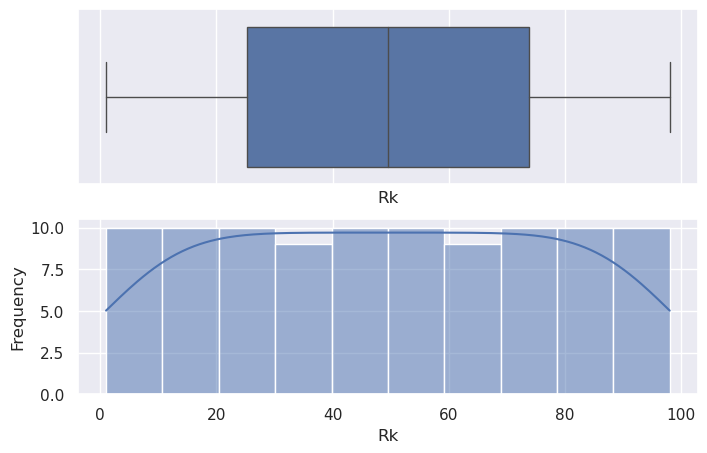

<Figure size 800x500 with 0 Axes>

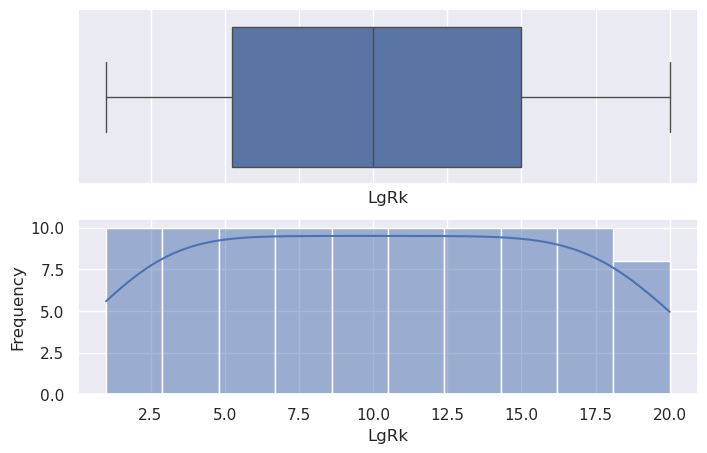

<Figure size 800x500 with 0 Axes>

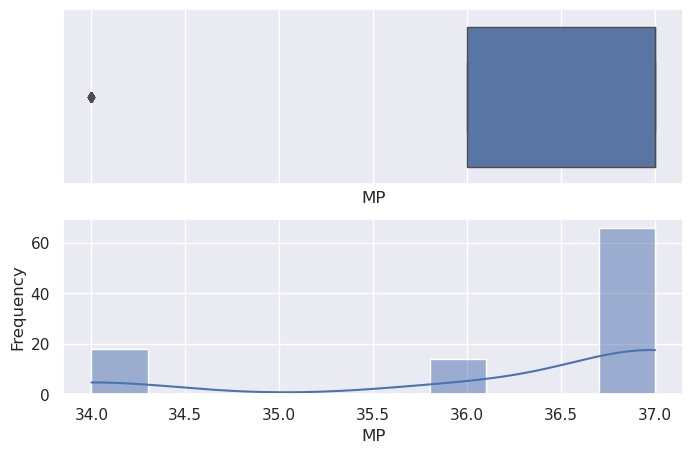

<Figure size 800x500 with 0 Axes>

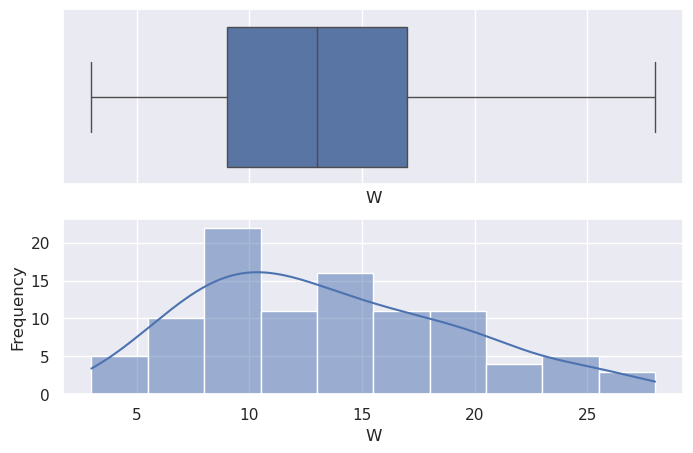

<Figure size 800x500 with 0 Axes>

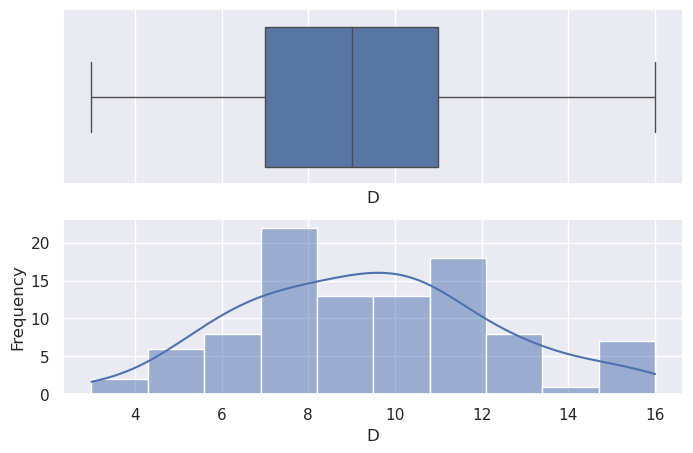

<Figure size 800x500 with 0 Axes>

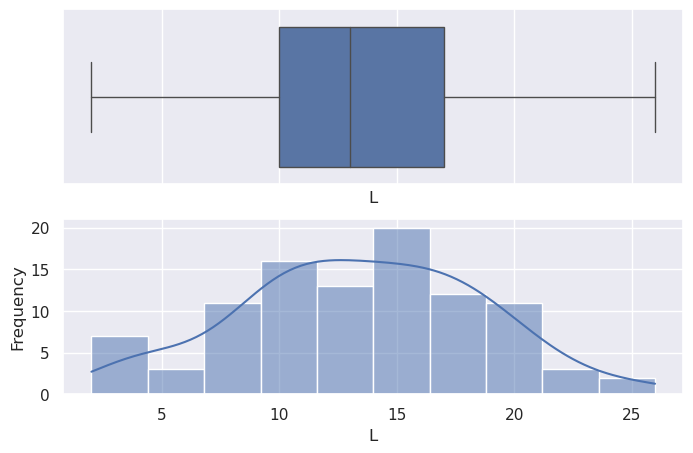

<Figure size 800x500 with 0 Axes>

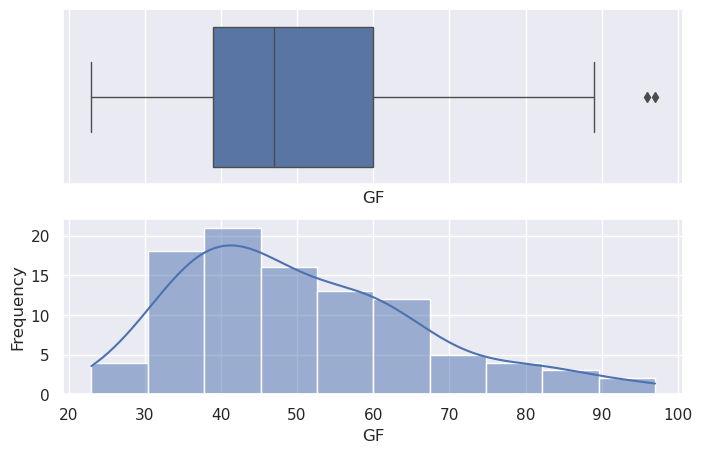

<Figure size 800x500 with 0 Axes>

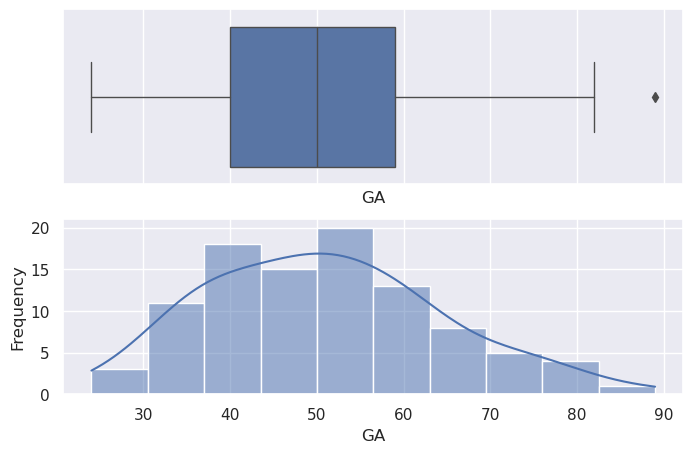

<Figure size 800x500 with 0 Axes>

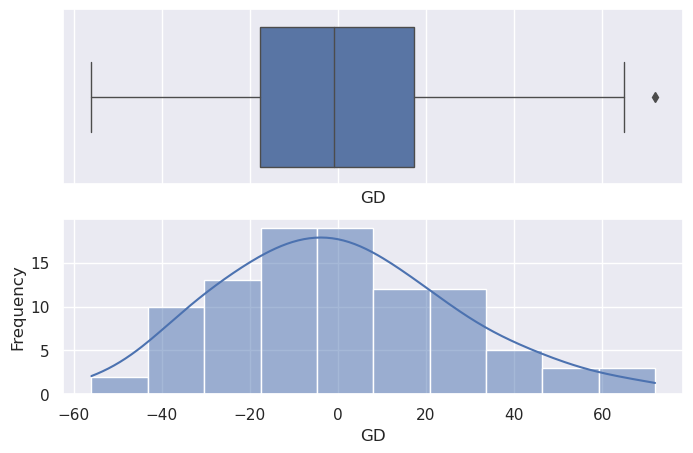

<Figure size 800x500 with 0 Axes>

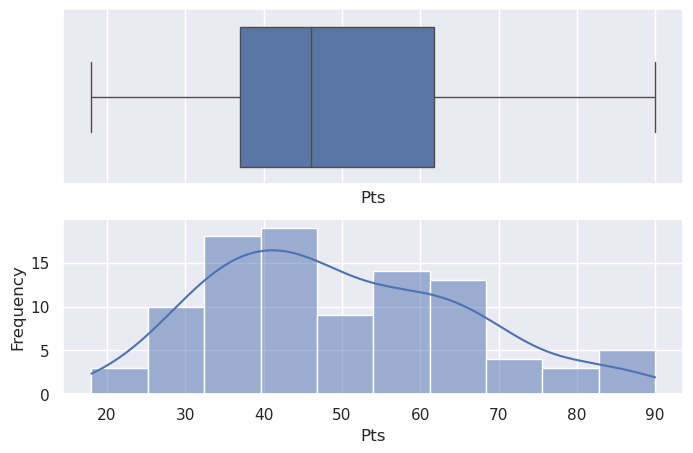

<Figure size 800x500 with 0 Axes>

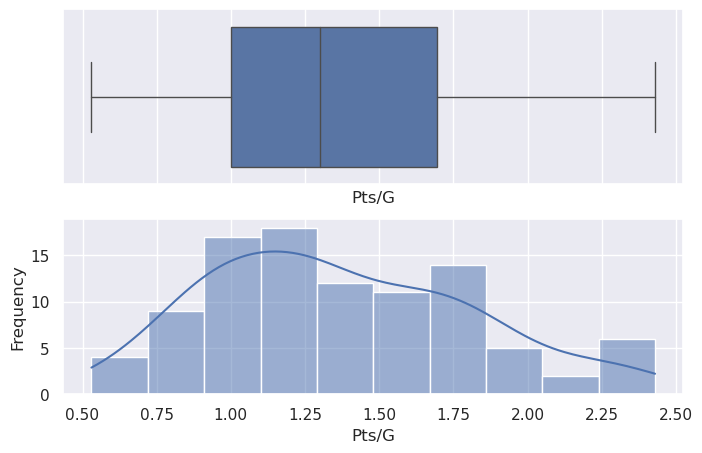

<Figure size 800x500 with 0 Axes>

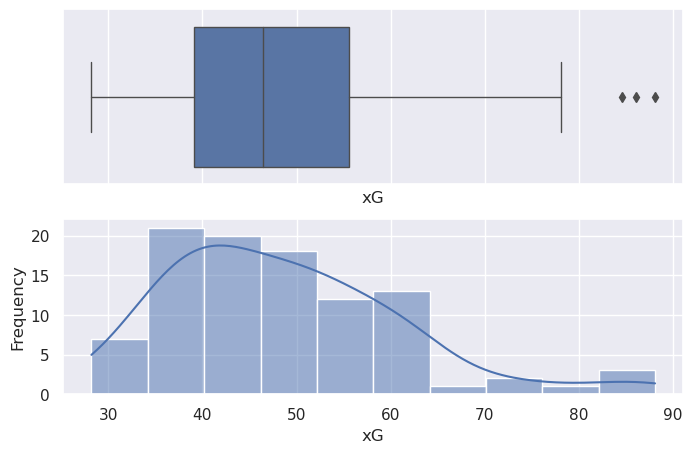

<Figure size 800x500 with 0 Axes>

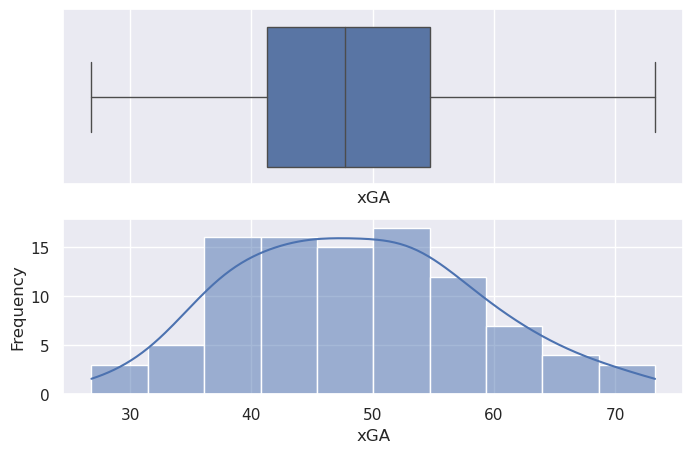

<Figure size 800x500 with 0 Axes>

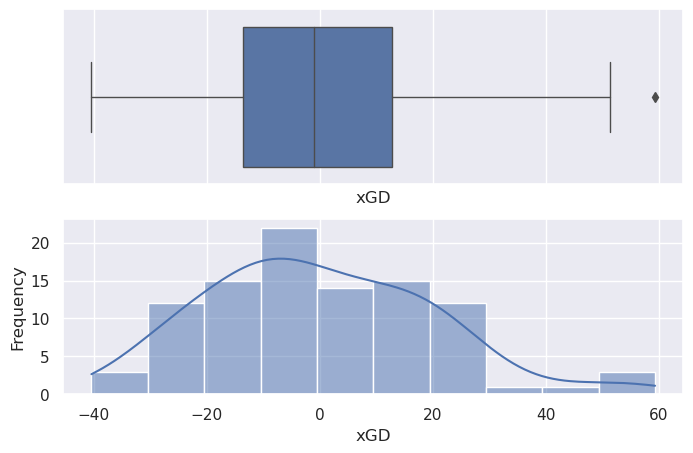

<Figure size 800x500 with 0 Axes>

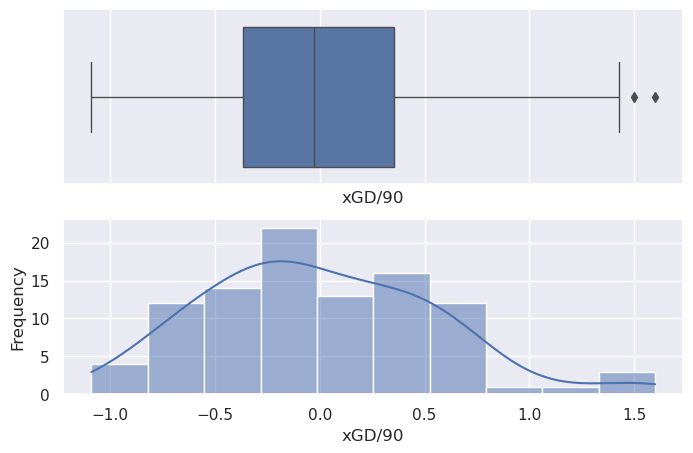

<Figure size 800x500 with 0 Axes>

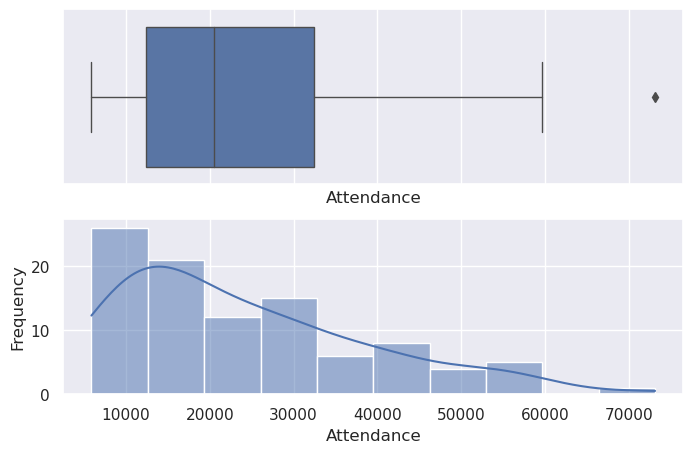

In [108]:
import warnings
warnings.filterwarnings("ignore")

cat_excloses = ['Squad','Country','Last 5','Top Team Scorer','Goalkeeper']

for i in df.columns:
    if i not in cat_excloses:

        plt.figure()
        plt.tight_layout()
        sns.set(rc={"figure.figsize":(8, 5)})
        f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
        plt.gca().set(xlabel= i, ylabel='Frequency')
        sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
        sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

# Exercici 1
Descarrega el dataset adjunt de dades oficials de la UEFA i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [90]:
df.head()

,Rk,Squad,Country,LgRk,MP,W,D,L,GF,GA,...,Pts,Pts/G,xG,xGA,xGD,xGD/90,Last 5,Attendance,Top Team Scorer,Goalkeeper
0,1,Manchester City,ENG,1,37,28,6,3,96,24,...,90,2.43,86.1,26.8,59.3,1.60,W W W W D,52739,Kevin De Bruyne - 15,Ederson
1,2,Liverpool,ENG,2,36,26,8,2,89,24,...,86,2.39,84.6,33.1,51.4,1.43,W W W D W,53367,Mohamed Salah - 22,Alisson
2,3,Real Madrid,ESP,1,37,26,7,4,80,31,...,85,2.30,73.0,45.8,27.2,0.73,W W L W D,40624,Karim Benzema - 27,Thibaut Courtois
3,4,Bayern Munich,GER,1,34,24,5,5,97,37,...,77,2.26,88.1,37.1,51.0,1.50,W W L D D,33176,Robert Lewandowski - 35,Manuel Neuer
4,5,Paris S-G,FRA,1,37,25,8,4,85,36,...,83,2.24,71.6,38.1,33.4,0.90,W D D D W,41188,Kylian Mbapp� - 25,Keylor Navas


In [5]:
df.isnull().values.any()

False

In [6]:
df.isna().values.any()

False

In [120]:

corr = df.corr()
corr.style.background_gradient(cmap="magma_r")

,Rk,LgRk,MP,W,D,L,GF,GA,GD,Pts,Pts/G,xG,xGA,xGD,xGD/90,Attendance,mitjanaGoals
Rk,1.000000,0.988130,0.048452,-0.966555,0.301579,0.924273,-0.855210,0.837186,-0.950350,-0.975809,-0.982258,-0.817633,0.789226,-0.896688,-0.895620,-0.542683,-0.845223
LgRk,0.988130,1.000000,0.077611,-0.952942,0.310066,0.910752,-0.843291,0.826181,-0.937446,-0.959944,-0.968642,-0.795941,0.779205,-0.878232,-0.876824,-0.532435,-0.836334
MP,0.048452,0.077611,1.000000,0.016391,0.251907,0.063785,-0.083514,-0.049424,-0.025317,0.061955,-0.036399,-0.065936,-0.039456,-0.021589,-0.022025,0.032255,-0.187106
W,-0.966555,-0.952942,0.016391,1.000000,-0.438612,-0.869553,0.880804,-0.795596,0.944505,0.986890,0.986395,0.851354,-0.753535,0.900125,0.898715,0.583984,0.862831
D,0.301579,0.310066,0.251907,-0.438612,1.000000,-0.017991,-0.364518,0.070288,-0.257648,-0.288033,-0.315227,-0.325834,0.072106,-0.238222,-0.241650,-0.243187,-0.386742
L,0.924273,0.910752,0.063785,-0.869553,-0.017991,1.000000,-0.800298,0.841547,-0.919229,-0.929928,-0.936085,-0.785229,0.795575,-0.879614,-0.876187,-0.510045,-0.790842
GF,-0.855210,-0.843291,-0.083514,0.880804,-0.364518,-0.800298,1.000000,-0.585596,0.908890,0.873521,0.886530,0.919444,-0.600808,0.867793,0.871334,0.483135,0.993876
GA,0.837186,0.826181,-0.049424,-0.795596,0.070288,0.841547,-0.585596,1.000000,-0.870293,-0.835098,-0.828477,-0.592486,0.861637,-0.791906,-0.787094,-0.376617,-0.567815
GD,-0.950350,-0.937446,-0.025317,0.944505,-0.257648,-0.919229,0.908890,-0.870293,1.000000,0.960402,0.964901,0.863488,-0.808352,0.934701,0.934376,0.487320,0.896021
Pts,-0.975809,-0.959944,0.061955,0.986890,-0.288033,-0.929928,0.873521,-0.835098,0.960402,1.000000,0.994677,0.848167,-0.790710,0.916410,0.914305,0.579261,0.850459


In [113]:
#Agafem l'atribut "D" que correspon als empats
shapiro_test = stats.shapiro(df['D'])

if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
else:
    print("Podem rebutjar l'hipotesis nula")

No podem rebutjar hipotesis nula


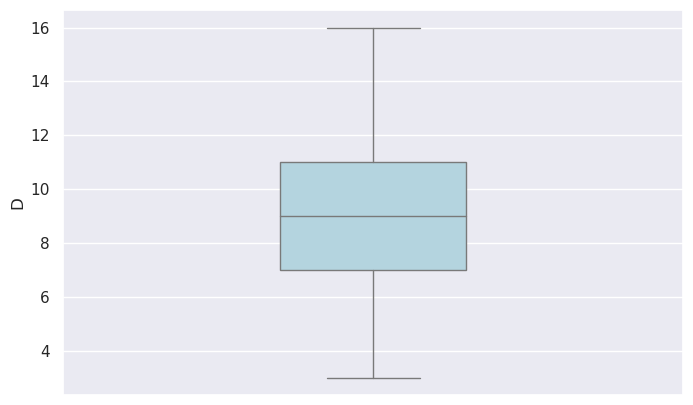

In [115]:
df.dtypes
sns.boxplot(y="D", data=df[df.D < 28],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

# - Exercici 2
Amb el mateix dataset selecciona dos altres atributs del conjunt de dades. Calcula els p-valors i digues si rebutgen la hipòtesi nul·la agafant un alfa de 5%.



In [10]:

#Agafem els atributs "Pts" i "GF" que tots dos són no gaussians.

shapiro_test = stats.shapiro(df['GF'])

if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
else:
    print("Podem rebutjar l'hipotesis nula")
    

shapiro_test = stats.shapiro(df['Pts'])

if shapiro_test.pvalue>0.05:
    print('No podem rebutjar hipotesis nula')
else:
    print("Podem rebutjar l'hipotesis nula")
    

Podem rebutjar l'hipotesis nula
Podem rebutjar l'hipotesis nula


<AxesSubplot:xlabel='Pts', ylabel='GF'>

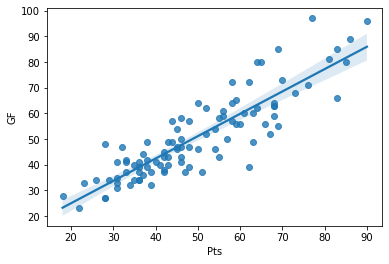

In [15]:
sns.regplot(x=df["Pts"], y=df["GF"])

# - Exercici 3
Continua amb el conjunt de dades adjunt i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [130]:
#Avaluem si les mitjanes de "Pts","Rk"i 'GA' són significativament diferents.

from scipy.stats import f_oneway

stat, p = f_oneway(df['Pts'], df['Rk'],df['GA'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
 print('Probably the same distribution')
else:
 print('Probably different distributions')



stat=0.127, p=0.881
Probably the same distribution


<AxesSubplot:>

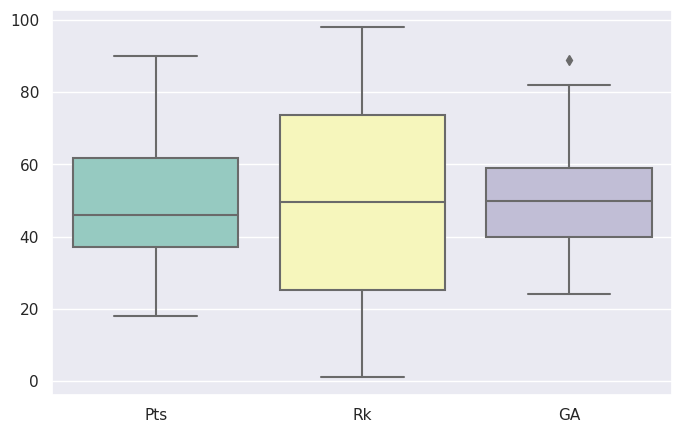

In [131]:
sns.boxplot(data=df[['Pts', 'Rk', 'GA']], palette="Set3")